Statistics Basic Questions

In [ ]:
# implement sampling techniques like random sampling and stratified
import pandas as pd
from sklearn.model_selection import train_test_split

# Sample dataset
data = {
    "Name": ["Alice", "Bob", "Charlie", "David", "Eva", "Frank", "Grace", "Hannah", "Ian", "Jane"],
    "Gender": ["Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", "Female"],
    "Age": [25, 30, 35, 40, 22, 29, 31, 28, 45, 26],
    "Education_Level": ["High School", "Bachelor", "Master", "PhD", "PhD", "Bachelor", "Master", "High School", "PhD", "Bachelor"]
}

df = pd.DataFrame(data)

# ---------------------------------------------
# 1. Random Sampling (e.g., 40% of the dataset)
# ---------------------------------------------
random_sample = df.sample(frac=0.4, random_state=42)
print("🔀 Random Sampling (40% of dataset):")
print(random_sample)

# ------------------------------------------------------
# 2. Stratified Sampling (based on 'Gender' column)
# ------------------------------------------------------
# We use sklearn's train_test_split with stratify parameter
stratified_sample, _ = train_test_split(df, test_size=0.6, stratify=df["Gender"], random_state=42)

print("\n🎯 Stratified Sampling (preserving gender ratio):")
print(stratified_sample)

# Optional: Show value counts to confirm stratification
print("\nGender Distribution in Full Dataset:")
print(df['Gender'].value_counts(normalize=True))

print("\nGender Distribution in Stratified Sample:")
print(stratified_sample['Gender'].value_counts(normalize=True))

🔀 Random Sampling (40% of dataset):
    Name  Gender  Age Education_Level
8    Ian    Male   45             PhD
1    Bob    Male   30        Bachelor
5  Frank    Male   29        Bachelor
0  Alice  Female   25     High School

🎯 Stratified Sampling (preserving gender ratio):
      Name  Gender  Age Education_Level
9     Jane  Female   26        Bachelor
4      Eva  Female   22             PhD
2  Charlie    Male   35          Master
5    Frank    Male   29        Bachelor

Gender Distribution in Full Dataset:
Gender
Female    0.5
Male      0.5
Name: proportion, dtype: float64

Gender Distribution in Stratified Sample:
Gender
Female    0.5
Male      0.5
Name: proportion, dtype: float64


In [17]:
# 5 Write a Python function to calculate the range of a dataset
data =[8,10,2,13,20]
max(data)-min(data)

18

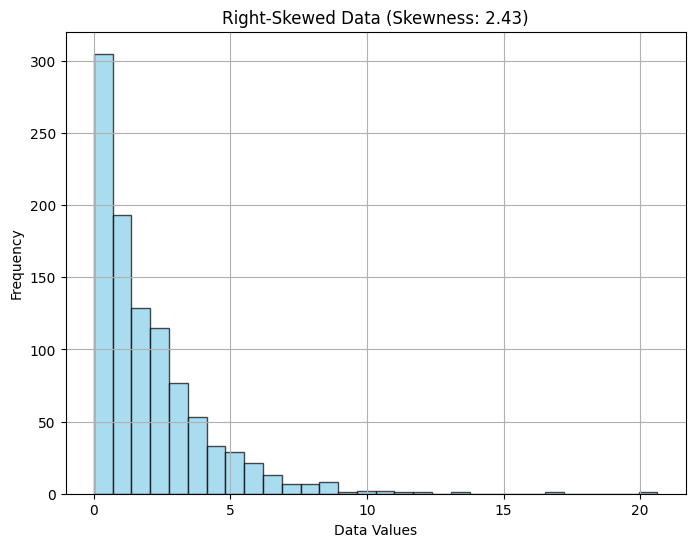

Right-Skewed Data: The data is right-skewed with a skewness of 2.43


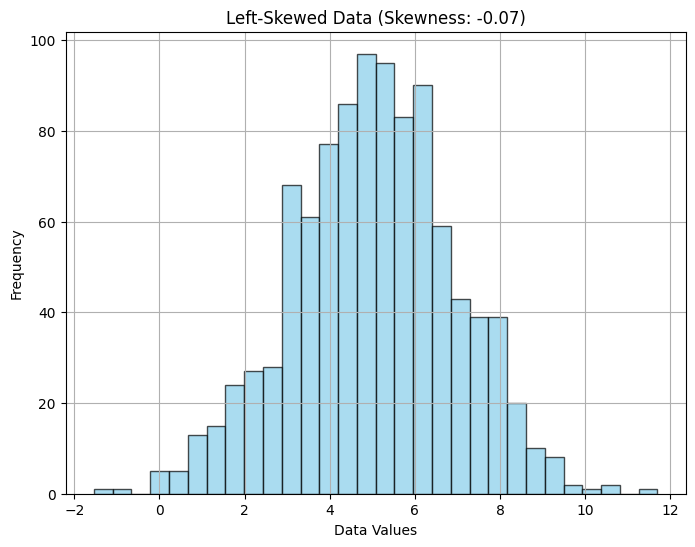

Left-Skewed Data: The data is left-skewed with a skewness of -0.07


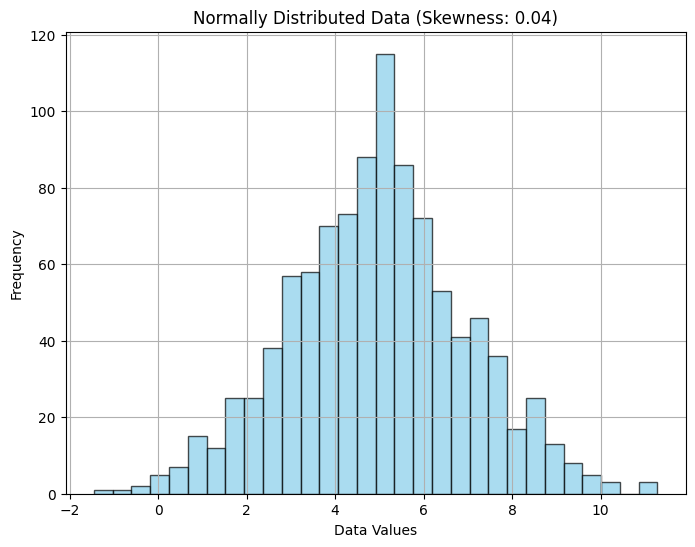

Normally Distributed Data: The data is right-skewed with a skewness of 0.04


In [18]:
# 6Create a dataset and plot its histogram to visualize skewness
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Generate a right-skewed dataset
data_right = np.random.exponential(scale=2.0, size=1000)
df_right = pd.DataFrame({'Data': data_right})

# Generate a left-skewed dataset
data_left = np.random.normal(loc=5, scale=2, size=1000)
data_left = 10 - data_left  # Reflect the data to create left skew
df_left = pd.DataFrame({'Data': data_left})

# Generate a normally distributed dataset (for comparison)
data_normal = np.random.normal(loc=5, scale=2, size=1000)
df_normal = pd.DataFrame({'Data': data_normal})


# Function to calculate skewness and plot histogram
def plot_skewness(df, title):
    """
    Calculates the skewness of the data in a DataFrame and plots a histogram.

    Args:
        df (pd.DataFrame): The input DataFrame containing the data.
        title (str): The title of the plot.
    """
    # Calculate skewness
    skewness = stats.skew(df['Data'])

    # Create the histogram
    plt.figure(figsize=(8, 6))
    plt.hist(df['Data'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    plt.xlabel('Data Values')
    plt.ylabel('Frequency')
    plt.title(f'{title} (Skewness: {skewness:.2f})')  # Include skewness in title
    plt.grid(True)
    plt.show()

    # Print skewness value
    if skewness > 0:
        print(f"{title}: The data is right-skewed with a skewness of {skewness:.2f}")
    elif skewness < 0:
        print(f"{title}: The data is left-skewed with a skewness of {skewness:.2f}")
    else:
        print(f"{title}: The data is approximately normally distributed with a skewness of {skewness:.2f}")

# Plot and print skewness for each dataset
plot_skewness(df_right, 'Right-Skewed Data')
plot_skewness(df_left, 'Left-Skewed Data')
plot_skewness(df_normal, 'Normally Distributed Data')


In [21]:
# Calculate skewness and kurtosis of a dataset using Python libraries
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

# Create a sample dataset
data = {'A': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'B': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
        'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 100],
        'D': [1, 2, 3, 4, 5, 4, 3, 2, 1, 5],
        'E': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'F': [2, 4, 6, 8, 10, 12, 14, 16, 18, 200],
       }
df = pd.DataFrame(data)

# Calculate skewness for each column
skewness = df.skew()

# Calculate kurtosis for each column
kurtosis = df.kurtosis()

# Print the results
print("Skewness for each column:")
print(skewness.to_markdown(numalign="left", stralign="left"))

print("\nKurtosis for each column:")
print(kurtosis.to_markdown(numalign="left", stralign="left"))

# Example Interpretation (for column 'C')
print("\nInterpretation for column 'C':")
if skewness['C'] > 0:
    print(f"Column 'C' is right-skewed (positive skewness: {skewness['C']:.2f}). The tail is elongated to the right.")
elif skewness['C'] < 0:
    print(f"Column 'C' is left-skewed (negative skewness: {skewness['C']:.2f}). The tail is elongated to the left.")
else:
    print(f"Column 'C' is approximately symmetric (skewness: {skewness['C']:.2f}).")

if kurtosis['C'] > 3:
    print(f"Column 'C' has high kurtosis (leptokurtic, kurtosis: {kurtosis['C']:.2f}).  It has heavy tails and a sharp peak.")
elif kurtosis['C'] < 3:
    print(f"Column 'C' has low kurtosis (platykurtic, kurtosis: {kurtosis['C']:.2f}). It has thin tails and a flat peak.")
else:
    print(f"Column 'C' has kurtosis close to 3 (mesokurtic, kurtosis: {kurtosis['C']:.2f}), similar to a normal distribution.")


Skewness for each column:
|    | 0      |
|:---|:-------|
| A  | 0      |
| B  | 0      |
| C  | 3.1189 |
| D  | 0      |
| E  | 0      |
| F  | 3.1189 |

Kurtosis for each column:
|    | 0        |
|:---|:---------|
| A  | -1.2     |
| B  | -1.2     |
| C  | 9.79924  |
| D  | -1.33393 |
| E  | -1.2     |
| F  | 9.79924  |

Interpretation for column 'C':
Column 'C' is right-skewed (positive skewness: 3.12). The tail is elongated to the right.
Column 'C' has high kurtosis (leptokurtic, kurtosis: 9.80).  It has heavy tails and a sharp peak.


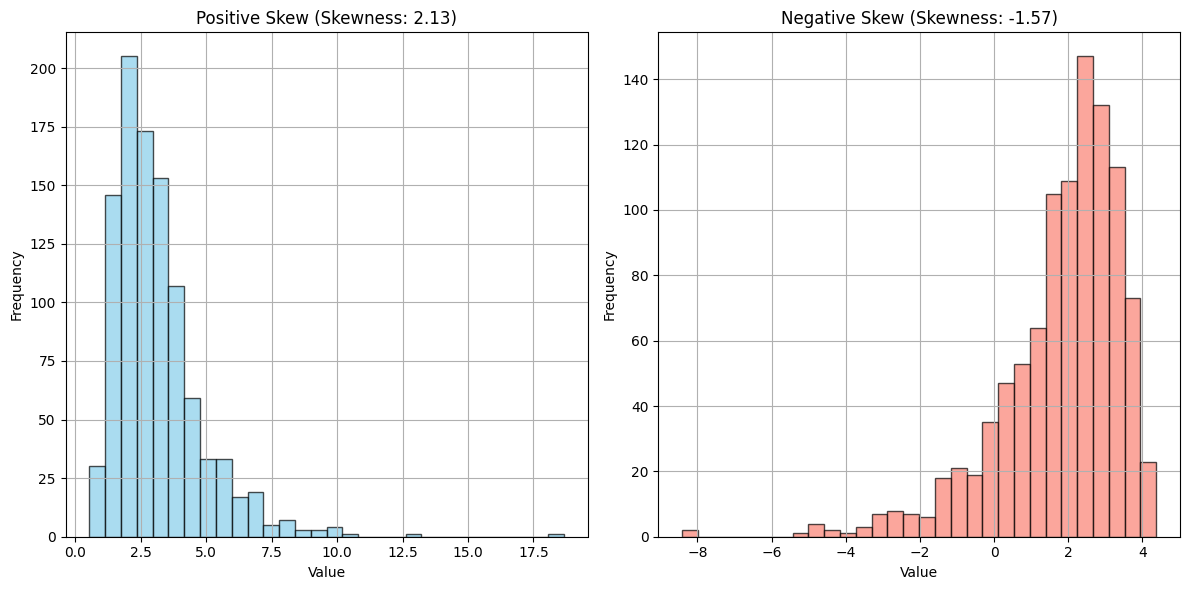

Skewness of positive skew data: 2.13
Skewness of negative skew data: -1.57


In [22]:
#Generate a dataset and demonstrate positive and negative skewness
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Generate datasets
np.random.seed(42)  # For reproducibility

# Positive skew (right-skewed) - using a log-normal distribution
positive_skew_data = np.random.lognormal(mean=1, sigma=0.5, size=1000)
positive_skew_df = pd.DataFrame({'Value': positive_skew_data})

# Negative skew (left-skewed) - reflecting a log-normal distribution
negative_skew_data = 5 - np.random.lognormal(mean=1, sigma=0.5, size=1000) #transformation
negative_skew_df = pd.DataFrame({'Value': negative_skew_data})

# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram for positive skew
axes[0].hist(positive_skew_df['Value'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_title(f"Positive Skew (Skewness: {stats.skew(positive_skew_df['Value']):.2f})")
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Frequency")
axes[0].grid(True)

# Plot histogram for negative skew
axes[1].hist(negative_skew_df['Value'], bins=30, color='salmon', edgecolor='black', alpha=0.7)
axes[1].set_title(f"Negative Skew (Skewness: {stats.skew(negative_skew_df['Value']):.2f})")
axes[1].set_xlabel("Value")
axes[1].set_ylabel("Frequency")
axes[1].grid(True)

# Adjust layout and display plots
plt.tight_layout()
plt.show()

# Print skewness values
print(f"Skewness of positive skew data: {stats.skew(positive_skew_df['Value']):.2f}")
print(f"Skewness of negative skew data: {stats.skew(negative_skew_df['Value']):.2f}")



In [23]:
#Write a Python script to calculate covariance between two datasets5
import numpy as np

def calculate_covariance(dataset1, dataset2):
    """
    Calculate the covariance between two datasets.

    Args:
        dataset1 (list or numpy.ndarray): The first dataset.
        dataset2 (list or numpy.ndarray): The second dataset.

    Returns:
        float: The covariance between the two datasets.  Returns np.nan if
               the datasets are empty or have different lengths.
    """
    # Convert datasets to numpy arrays for easier calculations
    dataset1 = np.asarray(dataset1)
    dataset2 = np.asarray(dataset2)

    # Check if the datasets are empty or have different lengths
    if len(dataset1) == 0 or len(dataset2) == 0 or len(dataset1) != len(dataset2):
        return np.nan  # Return Not a Number (NaN) for invalid input

    # Calculate the means of the datasets
    mean1 = np.mean(dataset1)
    mean2 = np.mean(dataset2)

    # Calculate the covariance
    covariance = np.sum((dataset1 - mean1) * (dataset2 - mean2)) / (len(dataset1) - 1) # Use (N-1) for unbiased sample covariance

    return covariance

def main():
    """
    Main function to demonstrate the calculation of covariance.
    """
    # Example datasets
    dataset1 = [1, 2, 3, 4, 5, 6, 7, 8, 9]
    dataset2 = [2, 4, 5, 4, 5, 6, 8, 9, 10]
    dataset3 = [9, 8, 7, 6, 5, 4, 3, 2, 1]
    dataset4 = [2, 4, 6, 8, 10]
    dataset5 = []

    # Calculate and print covariance for different pairs of datasets
    cov12 = calculate_covariance(dataset1, dataset2)
    print(f"Covariance between dataset1 and dataset2: {cov12:.2f}")

    cov13 = calculate_covariance(dataset1, dataset3)
    print(f"Covariance between dataset1 and dataset3: {cov13:.2f}")

    cov14 = calculate_covariance(dataset1, dataset4)
    print(f"Covariance between dataset1 and dataset4: {cov14}")

    cov15 = calculate_covariance(dataset1, dataset5)
    print(f"Covariance between dataset1 and dataset5: {cov15}")

    #Demonstrate zero covariance
    dataset6 = [1, 2, 3, 4, 5]
    dataset7 = [5, 4, 5, 6, 5]
    cov67 = calculate_covariance(dataset6, dataset7)
    print(f"Covariance between dataset6 and dataset7: {cov67:.2f}") #output should be close to zero

if __name__ == "__main__":
    main()


Covariance between dataset1 and dataset2: 6.88
Covariance between dataset1 and dataset3: -7.50
Covariance between dataset1 and dataset4: nan
Covariance between dataset1 and dataset5: nan
Covariance between dataset6 and dataset7: 0.50


In [24]:
#Write a Python script to calculate the correlation coefficient between two dataset
import numpy as np

def calculate_correlation_coefficient(dataset1, dataset2):
    """
    Calculate the Pearson correlation coefficient between two datasets.

    Args:
        dataset1 (list or numpy.ndarray): The first dataset.
        dataset2 (list or numpy.ndarray): The second dataset.

    Returns:
        float: The Pearson correlation coefficient between the two datasets,
               ranging from -1 to 1. Returns np.nan for invalid input.
    """
    # Convert datasets to numpy arrays for easier calculations
    dataset1 = np.asarray(dataset1)
    dataset2 = np.asarray(dataset2)

    # Check if the datasets are empty or have different lengths
    if len(dataset1) == 0 or len(dataset2) == 0 or len(dataset1) != len(dataset2):
        return np.nan  # Return Not a Number (NaN) for invalid input

    # Calculate the means of the datasets
    mean1 = np.mean(dataset1)
    mean2 = np.mean(dataset2)

    # Calculate the standard deviations of the datasets
    std1 = np.std(dataset1)
    std2 = np.std(dataset2)

    # Calculate the covariance
    covariance = np.sum((dataset1 - mean1) * (dataset2 - mean2)) / (len(dataset1) - 1)

    # Calculate the correlation coefficient
    if std1 == 0 or std2 == 0:
        return 0.0  # Handle the case where one or both standard deviations are zero
    correlation_coefficient = covariance / (std1 * std2)

    return correlation_coefficient

def main():
    """
    Main function to demonstrate the calculation of the correlation coefficient.
    """
    # Example datasets
    dataset1 = [1, 2, 3, 4, 5, 6, 7, 8, 9]
    dataset2 = [2, 4, 5, 4, 5, 6, 8, 9, 10]
    dataset3 = [9, 8, 7, 6, 5, 4, 3, 2, 1]
    dataset4 = [2, 4, 6, 8, 10]
    dataset5 = []

    # Calculate and print correlation coefficient for different pairs of datasets
    corr12 = calculate_correlation_coefficient(dataset1, dataset2)
    print(f"Correlation coefficient between dataset1 and dataset2: {corr12:.2f}")  # Positive correlation

    corr13 = calculate_correlation_coefficient(dataset1, dataset3)
    print(f"Correlation coefficient between dataset1 and dataset3: {corr13:.2f}")  # Negative correlation

    corr14 = calculate_correlation_coefficient(dataset1, dataset4)
    print(f"Correlation coefficient between dataset1 and dataset4: {corr14}")  # Error case: different lengths

    corr15 = calculate_correlation_coefficient(dataset1, dataset5)
    print(f"Correlation coefficient between dataset1 and dataset5: {corr15}")  # Error case: empty dataset

    #Demonstrate zero correlation
    dataset6 = [1, 2, 3, 4, 5]
    dataset7 = [5, 4, 5, 6, 5]
    corr67 = calculate_correlation_coefficient(dataset6, dataset7)
    print(f"Correlation coefficient between dataset6 and dataset7: {corr67:.2f}")

if __name__ == "__main__":
    main()


Correlation coefficient between dataset1 and dataset2: 1.08
Correlation coefficient between dataset1 and dataset3: -1.12
Correlation coefficient between dataset1 and dataset4: nan
Correlation coefficient between dataset1 and dataset5: nan
Correlation coefficient between dataset6 and dataset7: 0.56


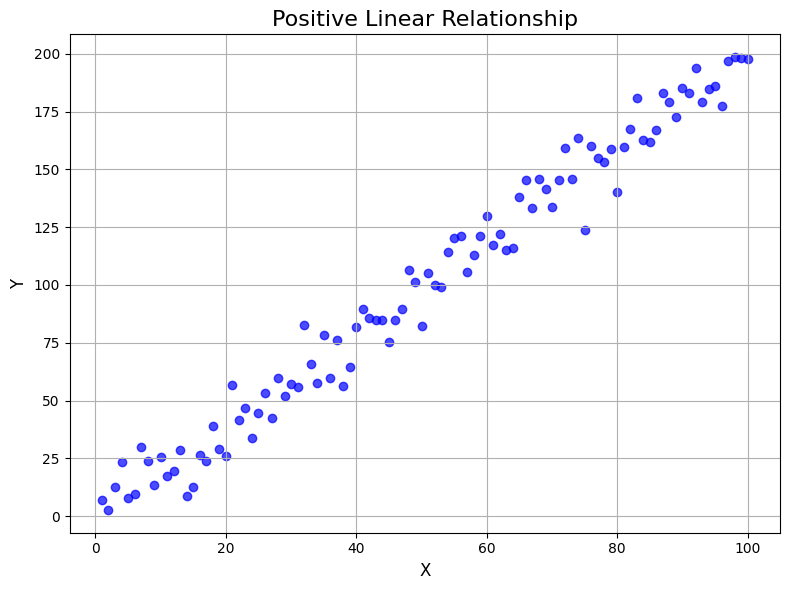

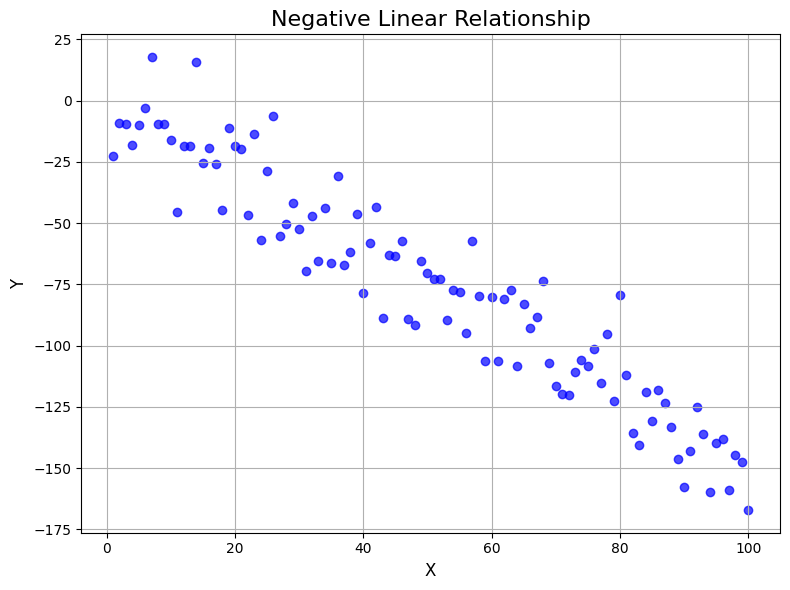

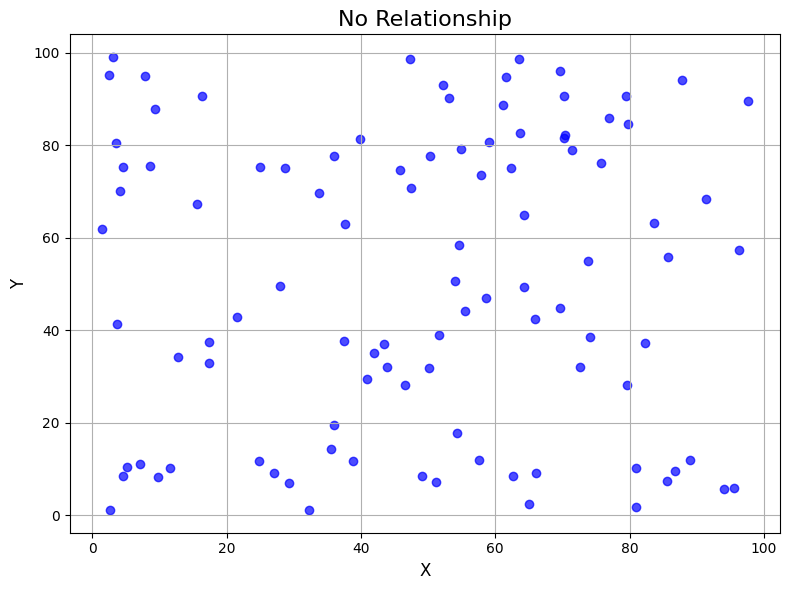

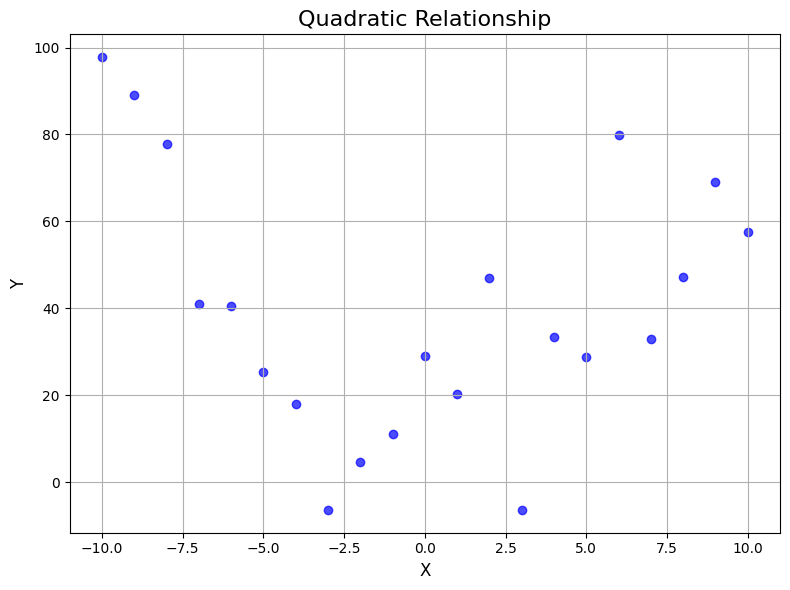

In [25]:
#Create a scatter plot to visualize the relationship between two variables
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def create_scatter_plot(dataset1, dataset2, title="Scatter Plot", xlabel="X Axis", ylabel="Y Axis"):
    """
    Creates a scatter plot to visualize the relationship between two variables.

    Args:
        dataset1 (list or numpy.ndarray): The first dataset (x-values).
        dataset2 (list or numpy.ndarray): The second dataset (y-values).
        title (str, optional): The title of the plot. Defaults to "Scatter Plot".
        xlabel (str, optional): The label for the x-axis. Defaults to "X Axis".
        ylabel (str, optional): The label for the y-axis. Defaults to "Y Axis".

    Returns:
        None.  Displays the plot.
    """
    # Convert datasets to numpy arrays for easier handling
    x = np.asarray(dataset1)
    y = np.asarray(dataset2)

    # Create the scatter plot
    plt.figure(figsize=(8, 6))  # Adjust figure size for better readability
    plt.scatter(x, y, alpha=0.7, color='blue', marker='o') # Added color and marker style
    plt.title(title, fontsize=16)  # Added fontsize for title
    plt.xlabel(xlabel, fontsize=12)  # Added fontsize for labels
    plt.ylabel(ylabel, fontsize=12)
    plt.grid(True)  # Add grid lines for better readability
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()

def main():
    """
    Main function to demonstrate the creation of scatter plots with different relationships.
    """
    # Generate datasets with different relationships
    np.random.seed(42)  # For reproducible results

    # 1. Positive linear relationship
    x1 = np.arange(1, 101)
    y1 = 2 * x1 + np.random.normal(0, 10, 100)  # Add some noise
    df1 = pd.DataFrame({'X': x1, 'Y': y1})
    create_scatter_plot(df1['X'], df1['Y'], title="Positive Linear Relationship", xlabel="X", ylabel="Y")

    # 2. Negative linear relationship
    x2 = np.arange(1, 101)
    y2 = -1.5 * x2 + np.random.normal(0, 15, 100)
    df2 = pd.DataFrame({'X': x2, 'Y': y2})
    create_scatter_plot(df2['X'], df2['Y'], title="Negative Linear Relationship", xlabel="X", ylabel="Y")

    # 3. No relationship (random)
    x3 = np.random.rand(100) * 100
    y3 = np.random.rand(100) * 100
    df3 = pd.DataFrame({'X': x3, 'Y': y3})
    create_scatter_plot(df3['X'], df3['Y'], title="No Relationship", xlabel="X", ylabel="Y")

    # 4. Quadratic relationship
    x4 = np.arange(-10, 11)
    y4 = x4**2 + np.random.normal(0, 20, 21)
    df4 = pd.DataFrame({'X': x4, 'Y': y4})
    create_scatter_plot(df4['X'], df4['Y'], title="Quadratic Relationship", xlabel="X", ylabel="Y")

if __name__ == "__main__":
    main()


In [ ]:
#Calculate the mean, median, and mode of grouped data


Questions and answer

1.What is statistics, and why is it important?
- Statistics is a mathematical science,including methods of collecting,organizing and analysing data in such a way that meaningful conclusions can be drawn from them
- Importance of statistics
1. Busninesses, government and researches use statistics to make data driven decisions

2. help identify patterns or trends in data over time(e.g disease spread)

3. used in finance,Insurance and engineering to analyze risk and uncertainty

2.What are the two main types of statistics?
- 1. Descriptive -
      - summarize and organize complete data you have
- 2. Inferential -
    - conclusion of large data made from sample.
    - When population is large you take out a sample from it. then calculate some statistics from sample
3.What are descriptive statistics?
- Descriptive -
    - summarize and organize complete data you have
- type of Descriptive statistics
    1. Measures of central tendancy
    - These represent center value of given data
      - Mean( Avg value)
      - Median (Middle value)
      - Mode( most frequent value)
    2. Measures of Dispersion
    - These represent how data is spread out
      - a) Range(Differnce between max and min value)
      - b) Quartile - Quartiles are value that divide a data set into four equal part , each containing 25% of data
      - 1. Q0- The smallest value in data set
      - 2. Q1- 25% of data lies below this point
      - 3. Q2- The median or 50% of data sent-divides data into 2 halves
      - 4. Q3- 75% of data lies below this point
      - 5. Q4 - The largest value in dataset
      - Iterquartile Range(IQR)- (Q3 - Q1)
      - c) Variance - variance tells how much the data poits away/differ from the mean value (avg of squared differences from the mean)
    3. Measure of distribustion(Shape)
    - These represent the shape and distribution of data
    - a) symmetrical (Skewness=0) - both side distribution is exactly same then it is symmetrical
    - b) positive skew - tail extend to the right(right skew,skewness>0)
    - c) negative skew - tail extend to the left (left skew, skewness<0)

4.What is inferential statistics?
- Inferential -
    - conclusion of large data made from sample.
    - When population is large you take out a sample from it. then calculate some statistics from sample

5.What is sampling in statistics?
- Smaller group selected from large group is called sampling
- sampling is process of selecting a subset of individuals from large group in oder to estimate characteristics of whole populations
- ex- 100 student from the school
- ex- all students in school

6.What are the different types of sampling methods?
 1. simple Random sampling
 - Every individual has an equal chance of selection
 - ex. Everyone has equal and fair chance .
 - it's like luck of draw

2. Stratified Sampling
 -Polulation is divided into groups and randome samples are taken from each group
 - Ex. 1 std to 10th std choose randomly 10 student from  each classroom

3. Systematic Sampling
 - select every kth individual from list after a random start
 - every 10th person on a class roster

4. Cluster sampling

 - Divide population into cluster ,then randomly select entire cluster.
 - ex. randomly select entier few state from india country

7.What is the difference between random and non-random sampling?
- random sampling - selction method is random, everyone has equal chance
- non random - selction method is by choice

8.Define and give examples of qualitative and quantitative data?
-  1.Quantitative -(Numerical)
 - This type of data is measurable and can be analyzed mathematically
 -a) Discrete - countable value , often integer
 - ex. number of cars, no of children
 -b) Continuous - can take any value within range,including decimal
 - ex. height, weight,temprature

- 2.qualitative- (Categorical)
 - this type of data describes categories and it can't be measured numerically
 - a) Nominal - Data with no natural order
 - ex.- Gender, blood group, marital status
 - b) Ordinal - Data with natural order
 - ex. - Education level(High school, bachelor's , master)
 - Poor,fair,good

9.What are the different types of data in statistics?
-  1.Quantitative -(Numerical)
-  2.qualitative- (Categorical)

10.Explain nominal, ordinal, interval, and ratio levels of measurement?
- 1.Nominal -take insight from data by counting, there is no order
 - Ex.Male - 4, Female- 6 in our team, USA ,Japan, india
- 2. Ordinal - data is categorized with meaningful order
 - ex. Education level- 10th, diploma, BE
- 3. Interval -data is ordered , equal intervals between values are meaningful,
 & doesn't have zero as starting point.
 - ex.- Temperature in celsius, IQ score , dates in calender
- 4. ratio level -order and rank values are meaningful, zero is starting point, ratio make sense (e.g. 10/5= 2/1 10 is twice of 5)
- ex. weight,height, age , income

11. What is the measure of central tendency?
- Central tendency tries to find that 1 value which can represent whole data
- central tendency represent the center point of dataset, using following points
- Mean, meadian, mode

12. Define mean, median, and mode?
- Mean-
 - summing up all observations and divide by no of observation
 - arithmetic average, if outlier is not there then use Mean
- Median -
  - Median is middle most element,if oulier is there then use median
- Mode-
  - value which is repeadted maximum number of times
  - useful for categorial data

13.What is the significance of the measure of central tendency
- Reduces a large data into single value
- help in decision making
- foundation for further analysis

14.What is variance, and how is it calculated?
- variance -(arrow thrown on target point)
- it is statistical measure that describes how much the values in dataset are away from mean(Avg) of the dataset.gives idea about spread of the data.
- if variance is small, the number are close to mean
- if variance large, the number are spread out over wider range
- calulation step
- data [2,4,6,8,10]
- mean =6
- (2-6)^2+(4-6)^2+(6-6)^2+(8-6)^2+(10-6)^2 / 5 = 8

15. What is standard deviation, and why is it important?
- it's square root of variance
- it shows how much values deviate from avarage
- help in understanding distribution

16.What is standard deviation, and why is it important?
- it tells difference between the highest and lowest values
- data [55,60,65,70,85] = 85-55 = 30 is range
- importance -
- it gives you idea how spread out your data is
- easy to calculate

17.What is the difference between variance and standard deviation?
- Variance -
  - avg of squared differnce from mean
  - unit is squared (meters ^2)
- standard deviation
  - square root of variance
  - same unit as data (meters)

18.What is skewness in a dataset?
- A distribustion is skewed if it is not mirrored on both side of center
- there are 2 type of skewness
- 1.Positive skewed -
  - tail to the right -mode->median->mean (mean is greater than all
- 2.negatively skewed-
   -tail to the left side - mean ->median->mode (mean is smaller than median)

19.What does it mean if a dataset is positively or negatively skewed?
- it tells u about the shape of it's distribution and how the data is spread around average

20.Define and explain kurtosis?
- tells how heavy or light the tails are compared to normal distribution

21.What is the purpose of covarianc?
- covariance means your trying to understand the relationship of a feature with respective another feature (X and Y)
- importance -
- Identify relationship direction
- postive covariance - when 1 variable increases, the other tends to increase
- ex. if area of house more then price will be more
- negative covariance - when 1 variabke increases, the other tends to decrease
- ex. if alcohol consumption is more then life span will be decrease

22.What is the difference between covariance and correlation?
- covariance- measure direction of relationship
- correlation - measuere direction and strength of relationship

23.What are some real-world applications of statistics?

- Medical research
- Business & marketing
- Finance and economics
- Sport analytics










In [ ]:
#How do you calculate the mean, median, and mode of a dataset
import numpy as np
data1 =[170,180,100,120,122]
np.mean(data1)


170

In [ ]:
import statistics
data3 =[4,2,2,3,7,8]
statistics.mode(data3)

2

In [ ]:
import numpy as np
data2 =[17,18,10,12,100]
np.median(data2)

np.float64(17.0)

In [ ]:
#Write a Python program to compute the variance and standard deviation of a dataset
import numpy as np
data= [2,3,4,5,8,9,12,40,41,15]
np.var(data)

np.float64(191.69000000000003)

In [ ]:
import numpy as np
data= [2,3,4,5,8,9,12,40,41,15]
np.std(data)

np.float64(13.8452157801892)

In [ ]:
# Create a dataset and classify it into nominal, ordinal, interval, and ratio types
import pandas as pd

# Create a sample dataset
data = {
    "Name": ["Alice", "Bob", "Charlie", "David", "Eva"],                     # Nominal
    "Education_Level": ["High School", "Bachelor", "Master", "PhD", "PhD"], # Ordinal
    "Temperature_C": [36.6, 37.0, 36.8, 36.5, 37.2],                         # Interval
    "Age": [25, 30, 35, 40, 22],                                            # Ratio
    "Gender": ["Female", "Male", "Male", "Male", "Female"]                 # Nominal
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Define column types
measurement_types = {
    "Name": "Nominal",
    "Education_Level": "Ordinal",
    "Temperature_C": "Interval",
    "Age": "Ratio",
    "Gender": "Nominal"
}

# Display the DataFrame
print("Dataset:")
print(df)

print("\nMeasurement Scales:")
for column, scale in measurement_types.items():
    print(f"{column}: {scale}")

Dataset:
      Name Education_Level  Temperature_C  Age  Gender
0    Alice     High School           36.6   25  Female
1      Bob        Bachelor           37.0   30    Male
2  Charlie          Master           36.8   35    Male
3    David             PhD           36.5   40    Male
4      Eva             PhD           37.2   22  Female

Measurement Scales:
Name: Nominal
Education_Level: Ordinal
Temperature_C: Interval
Age: Ratio
Gender: Nominal
